# 1. Erläuterung Paper
Grundlage dieser Arbeit ist ein Paper, sowie das zugehörige GitHub-Repository und ein Datensatz veröffentlicht von Valeo.ai
und erarbeitet von Julien Rebut, Arthur Ouaknine, Waqas Malik und Patrick Pérez.

## 1.1 Prämisse und Motivation des Papers

Die Prämisse des Papers besteht darin, die praktissche Anwendbarkeit von hochauflösenden Radarsystemen zu verbessern, insbesondere durch die Entwicklung einer optimierten Deep-Learning-Architektur und die Bereitstellung von Rohdaten für die Forschungsgemeinschaft.

Die Motivation hinter der Arbeit liegt in der Herausforderung, die hohe Rechenkomplexität bei der Verarbeitung von HD-Radarbildern zu überwinden und die Effizienz von Radarsensoren für Fahrzeuganwendungen zu steigern. Dies wird angesichts der langsamen Fortschritte bei der Anwendung von Deep Learning für die Radarverarbeitung und des Mangels an öffentlich zugänglichen Datensätzen als besonders relevant erachtet.

## 1.2 Aufbau des Papers und des Modells

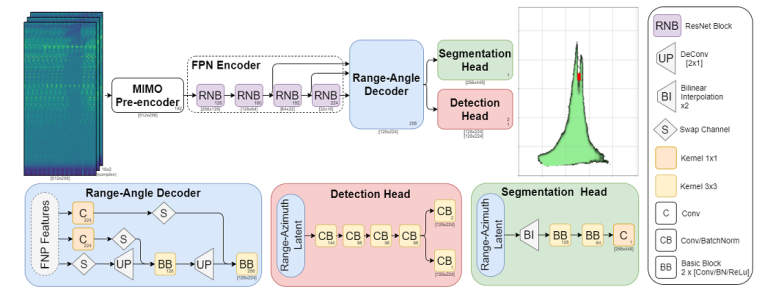




### Datensatz
Der Datensatz des Papers "Raw High-Definition Radar for Multi-Task Learning" beinhaltet Daten von drei verschiedenen Sensortypen: Kamera, Radar und Laser (LIDAR). Er besteht aus 14025 einzelnen Fahrsituation mit den jeweils zugehörigen Sensordaten und Label.

### Modell 
Das Modell besteht aus fünf Blöcken, die im Folgenden jeweils kurz vorgestellt werden sollen.

#### MIMO pre-encoder
MIMO steht für "Multiple Inputs Multiple Outputs". Er transformiert die Range-Doppler-Spektren kompaktere Form mittels deinterleaving in eine kompaktere Form. Diese Maßnahme wird ergriffen, da jedes detektierte Objekt im Range-Doppler-Spektrum mehrfach auftritt - einmal für jeden Sender. Der MIMO pre-encoder hilft dabei, diese Signaturen zu organiseren und zu komprimieren.

#### FPN-Encoder
Der FPN-Encoder (Feature Pyramidial Network Encoder) dient dazu, die Merkmale aus den Radardaten zu extrahieren, und in verschiedene Maßstäben und Auflösungen zu erlernen. So lernt das Netz, Merkmale aus verschiedenen Skalen zu kombinieren, was das Netz insgesamt robuster und zuverlässiger gegenüber kontextsensitiven Information macht.

#### Range-Angle-Decoder 


# 2. Das Projekt ImageRader

## 2.1 Inspiration für das durchgeführte Projekt

In dem unserem Projekt zugrunde liegenden Paper werden die Rohdaten hochauflösender Radarsensoren in ein neuronales Netz gespeist. Dieses Netz soll den sogenannten "Free Driving Space", also den hindernisfreien Bereich der Fahrbahn vor dem Fahrzeug, berechnen. Die Herausforderung darin besteht nicht nur in der Komplexität des Netzes, sondern auch in der dafür notwendigen enormen Rechenleistung, um schnell die richtigen Ergebnisse zu erhalten.

Die Motivation, dieses Projekt durchzuführen folgte aus der Frage: Ist es möglich ein Neuronales Netz gegen hochverarbeitete Daten zu trainieren? Und falls ja, kann man damit qualitativ ähnliche Ergebnisse zu erzielen? 

Dies herangehensweise würde die erforderliche Rechenleistung stark reduzieren und eine Anwendung im Fahrzeug erleichtern.

## 2.2 Grundlagenwissen Radar

### Radar

#### Allgemein

* Reichweite: 70m - 500m (je nach Auslegung der Antenne/Blickwinkel, sowie Zielgröße)
* Frequenzen:
    * Long-range: 76-77 GHz
    * Short-range: 77-81 GHz
* Für die interne Verarbeitung wird eine mittlere Datenrate (CAN) bis hohe Datenrate (100 Mbit Ethernet) benötigt
* Probleme: (feuchter) Schnee oder Eis vor dem Sensor
* 4D- Erkennung (Range, Azimuth, Elevation, Velocity)
    * Mehrere Antennen notwendig
* Die Signalstärke ist vom Objekt abhängig. Sowohl das Material, die Größe, sowie die Form spielen hierbei eine Rolle (Ein kleiner Tripelspiegel hat eine höhere Signalstärke als ein Haus).
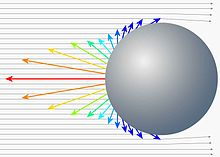
Zur Beurteilung wird der RCS- Wert herangenommen. Dieser gibt die effektive Reflexionsfläche eines Objekts an. 


* Je mehr Messzyklen (Frames) gemacht werden, desto höher ist die Genauigkeit der Messung, da mehr Messpunkte eines Objekts an den Antennen ankommen
    * Problem: Um frühe Reaktionen auszulösen, sind schnelle Messungen notwendig (Detektionszeit und Genauigkeit stehen in Relation)

#### Aufbau

* Transmitter (Tx) -> Ausstrahlen elektromagnetischer Wellen in bestimmte Richtung
* Radar Receiver (Rx) -> empfängt das reflektierte Signal

#### Verfahren

Zunächst wird eine oder mehrere Frequenzrampen (Chirp) ausgesendet. Das reflektierte Signal wird von den Receiver Antennen aufgenommen. Das empfangene Signal wird mit dem Sendesignal gemischt und mit einem Tiefpassfilter gefiltert. Es resultiert ein Signal mit der Differenzfrequenz aus Sende- und Empfangssignal. Diese Differenzfrequenz (Dopplerfrquenzverschiebung) ist proportional zur Entfernung des Objektes.

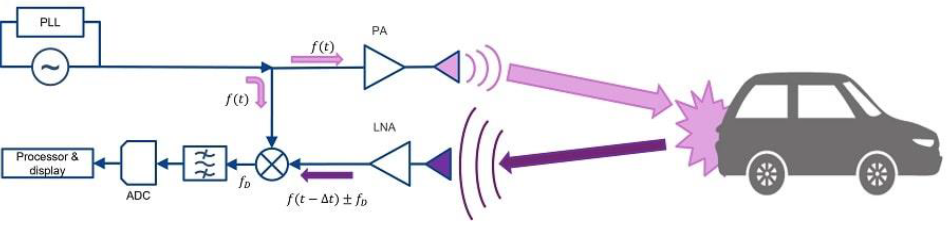

#### Frequency Modulated Continous Wave Radar (FMCW Radar)

Hierbei handelt es sich um eine periodische Frequenzmodulation. Die Transmitter und Receiver arbeiten gleichzeitig.
Die Entfernungsmessung erfolgt über die Formel $𝑟= \frac{𝑐}{2} \frac{Δ𝑓}{𝑑𝑓/𝑑𝑡}$ mit c = Lichtgeschwindigkeit, $\frac{df}{dt}$ = Steilheit der Frequenzänderung, Δ𝑓= Frequnezänderung auf dem Weg r
Bei relativer Bewegung zum Radar, verschiebt sich das Empfangssignal um $f_D$ nach oben oder unten
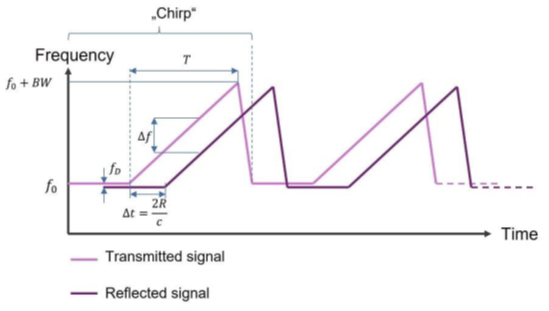


* Mit FMCW sind sehr kleine Zielentfernung möglich
* Entfernung und Radialgeschwindikeit gleichzeitig messbar
* Signalverarbeitung in niedrigem Frequenzbereich -> einfache Schaltungstechnik

#### Winkelmessung

Für die Winkelmessung wird ein Antennen Array benötigt. Die Auflösung verdoppelt sich mit jeder Sendeantenne.

Methoden:
* Unterschiedliche Empfindlichkeit in verschiedene Richtungen -> Winkelschätzung
* Ein augesendetes Signal kommt zu unterschiedlichen Zeiten am Receiver an -> Phasenunterschied $ΔΦ$
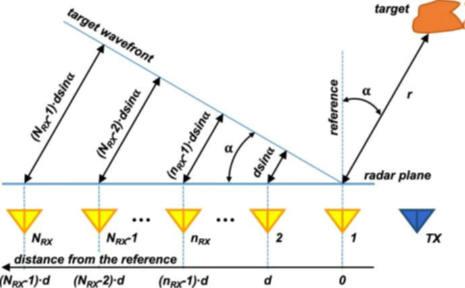
Der Phasenunterschied steigt linear zum Abstand der Antennen.

#### Radar Cube

Der Radar Cube ist eine dreidimensionale Datenstruktur.
Eine erste (Range-)FFT entlang jedem Chirps liefert die Entfernungsinformation.
Eine weitere (Doppler-)FFT liefert die Geschwindigkeitsinformation.
Um den Cube zu erhalten, werden alle Rauminformationen aus allen Kanälen kombiniert.

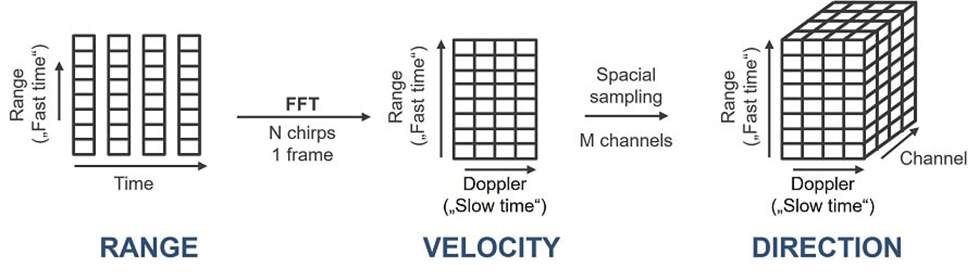

* Ein Radar Cube lässt sich in eine Punktwolke umwandeln.

#### MIMO (Multiple Input Multiple Output)

Ein MIMO Radar ist ein System mit vielen Antennen. N Sendeantennen und K Empfangsantennen ergeben ein rechnerisches virtuelles Feld von $N*K$ Elementen

Vorteile:
* Verbessertes räumliches Auflösungsvermögen
* Verbesserte Immunität gegen Störungen
* Verbesserte Entdeckungswahrscheinlichkeit der Ziele
* Da jeder Strahler einen eigenen Waveform Generator hat, gibt es individuelle Signalformen

### Radarpunktwolken

Bei Punktwolken handelt es sich um eine 3D-Darstellung des Raums mit den Empfangenensignalen an den entsprechenden Positionen im Raum. Die Intesität des einzelnen Punktes gibt die Intensität des empfangenen Signal wieder. Kommen von einem Objekt mehrere Signale zurück so entsteht eine Ansammlung von Punkten (Cluster). Solche Cluster können mit Hilfe von neuronalen Netzen gruppiert und gelabelt werden.

### DDM - Doppler-Divison-Multiplexing

Bei einer DDM werden die Signale gleichzeitig ausgesendet. Die Sendeantennen haben dabei einen Phasenversatz $𝜔_k = \frac{2π(k-1)}{N}$ entlang der Geschwindigkeitsachse. Somit können die Signale in der Dopplerebene separiert werden.

Vorteil: Durch Zero-Padding kann eine genauere Geschwindigkeit des Objekts bestimmt werden

Nachteil: Die eindeutige Doppler- Geschwindigkeit ist um $\frac{1}{N}$ reduziert



## 2.3 Zugrundeliegende Daten

### Datensatz

### Label

## 2.4 Modell

#### Anmerkungen
Der Code zu diesem Projekt ist unter folgenem Link auf unserem GitHub Repository zu finden: https://github.com/zaph01/ImageRadar



Die Arbeit von Julien Rebut, Arthur Ouaknine, Waqas Malik und Patrick Pérez ist unter folgenden Links zu finden: 

Paper: https://openaccess.thecvf.com/content/CVPR2022/papers/Rebut_Raw_High-Definition_Radar_for_Multi-Task_Learning_CVPR_2022_paper.pdf

GitHub-Repository: https://github.com/valeoai/RADIal